## 线性分类
* 不能使用现成机器学习库（比如sklearn, tensorflow, caffe, pytorch等），用numpy实现线性分类
* 文件x_train.npy和t_train.npy给出训练数据和真值
* 提交对于文件test所给数据的预测结果，以numpy数组的形式存储为文件t_test.npy
* 以文本文件的形式提交分类平面的表达式

数据演示如下：

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

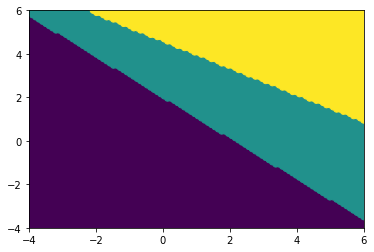

In [92]:
x_train = np.load('x_train.npy')
t_train = np.load('t_train.npy')
x_test = np.load('x_test.npy')
plt.scatter(x_test[:, 0], x_test[:, 1], c=t_test_pred)  # maybe the color
plt.xlim([-4, 6])
plt.ylim([-4, 6])
#添加
num_training = 75
num_validation = 0

# n = np.random.permutation(t_train.shape[0])
# x_train = x_train[n,:]
# t_train = t_train[n]


# mask = list(range(num_training, num_training + num_validation))
# x_val = x_train[mask]
# t_val = t_train[mask]
# mask = list(range(num_training))
# x_train = x_train[mask]
# t_train = t_train[mask]

# Preprocessing: reshape the image data into rows
x_train = np.reshape(x_train, (x_train.shape[0], -1))
# x_val = np.reshape(x_val, (x_val.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
    
# Normalize the data: subtract the mean image
mean_image = np.mean(x_train, axis = 0)
x_train -= mean_image
# x_val -= mean_image
x_test -= mean_image
    
# add bias dimension and transform into columns
x_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])
# x_val = np.hstack([x_val, np.ones((x_val.shape[0], 1))])
x_test = np.hstack([x_test, np.ones((x_test.shape[0], 1))])

In [16]:
from softmax import *
from linear_classifier import *
from linear_classifier import Softmax

In [88]:
results = {}
best_val = -1
best_softmax = None
learning_rates = [6e-1, 8e-1]
regularization_strengths = [2.5e-2,5e-2]

for lr in np.arange(learning_rates[0],learning_rates[1],1e-2):
    for reg in np.arange(regularization_strengths[0],regularization_strengths[1],2e-3):
        softmax = Softmax()   
        #如果这一步不写，就会之前训练的W矩阵接着训练，自然是效果越来越好，num_iters不能太小，否则很难收敛
        loss_hist = softmax.train(x_train, t_train, lr, reg,num_iters=1000,verbose=True)  #这部分还是要好好看
        t_val_pred = softmax.predict(x_val)
        print(t_val_pred.shape)
        t_train_pred = softmax.predict(x_train)
        results[(lr,reg)] =  [np.mean(t_train == t_train_pred) , np.mean(t_val == t_val_pred) ]     #accurancy 原来是字典形式赋值
        for l in results.values():
            if l[0] > best_val:
                best_val = l[0]
                best_softmax = softmax
                best_w = best_softmax.W
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f  val accuracy: %f' % (
                  lr, reg, train_accuracy,val_accuracy))
    
print('best validation accuracy achieved during train: %f' % best_val)
#做测试集
t_test_pred = best_softmax.predict(x_test)

iteration 0 / 1000: loss 1.096877
iteration 100 / 1000: loss 0.351390
iteration 200 / 1000: loss 0.477652
iteration 300 / 1000: loss 0.438332
iteration 400 / 1000: loss 0.398634
iteration 500 / 1000: loss 0.418507
iteration 600 / 1000: loss 0.467769
iteration 700 / 1000: loss 0.422739
iteration 800 / 1000: loss 0.434769
iteration 900 / 1000: loss 0.423385
(15,)
iteration 0 / 1000: loss 1.098001
iteration 100 / 1000: loss 0.403596
iteration 200 / 1000: loss 0.450893
iteration 300 / 1000: loss 0.470815
iteration 400 / 1000: loss 0.414685
iteration 500 / 1000: loss 0.450385
iteration 600 / 1000: loss 0.372918
iteration 700 / 1000: loss 0.415763
iteration 800 / 1000: loss 0.388107
iteration 900 / 1000: loss 0.452170
(15,)
iteration 0 / 1000: loss 1.097064
iteration 100 / 1000: loss 0.429092
iteration 200 / 1000: loss 0.420191
iteration 300 / 1000: loss 0.464782
iteration 400 / 1000: loss 0.406240
iteration 500 / 1000: loss 0.445417
iteration 600 / 1000: loss 0.437534
iteration 700 / 1000: 

iteration 900 / 1000: loss 0.440951
(15,)
iteration 0 / 1000: loss 1.098187
iteration 100 / 1000: loss 0.514452
iteration 200 / 1000: loss 0.470507
iteration 300 / 1000: loss 0.422321
iteration 400 / 1000: loss 0.437842
iteration 500 / 1000: loss 0.501007
iteration 600 / 1000: loss 0.412349
iteration 700 / 1000: loss 0.458260
iteration 800 / 1000: loss 0.470054
iteration 900 / 1000: loss 0.472368
(15,)
iteration 0 / 1000: loss 1.098397
iteration 100 / 1000: loss 0.469853
iteration 200 / 1000: loss 0.469685
iteration 300 / 1000: loss 0.445381
iteration 400 / 1000: loss 0.447094
iteration 500 / 1000: loss 0.451110
iteration 600 / 1000: loss 0.486904
iteration 700 / 1000: loss 0.491914
iteration 800 / 1000: loss 0.446798
iteration 900 / 1000: loss 0.466899
(15,)
iteration 0 / 1000: loss 1.098664
iteration 100 / 1000: loss 0.422426
iteration 200 / 1000: loss 0.444708
iteration 300 / 1000: loss 0.407668
iteration 400 / 1000: loss 0.416928
iteration 500 / 1000: loss 0.443226
iteration 600 / 

iteration 800 / 1000: loss 0.505146
iteration 900 / 1000: loss 0.511183
(15,)
iteration 0 / 1000: loss 1.098219
iteration 100 / 1000: loss 0.443330
iteration 200 / 1000: loss 0.426507
iteration 300 / 1000: loss 0.500727
iteration 400 / 1000: loss 0.456091
iteration 500 / 1000: loss 0.462395
iteration 600 / 1000: loss 0.469629
iteration 700 / 1000: loss 0.488987
iteration 800 / 1000: loss 0.467603
iteration 900 / 1000: loss 0.441051
(15,)
iteration 0 / 1000: loss 1.099318
iteration 100 / 1000: loss 0.490983
iteration 200 / 1000: loss 0.459586
iteration 300 / 1000: loss 0.460900
iteration 400 / 1000: loss 0.520591
iteration 500 / 1000: loss 0.479618
iteration 600 / 1000: loss 0.461113
iteration 700 / 1000: loss 0.479899
iteration 800 / 1000: loss 0.515603
iteration 900 / 1000: loss 0.449677
(15,)
iteration 0 / 1000: loss 1.099795
iteration 100 / 1000: loss 0.507793
iteration 200 / 1000: loss 0.483442
iteration 300 / 1000: loss 0.477699
iteration 400 / 1000: loss 0.478971
iteration 500 / 

iteration 800 / 1000: loss 0.430998
iteration 900 / 1000: loss 0.435077
(15,)
iteration 0 / 1000: loss 1.098762
iteration 100 / 1000: loss 0.456140
iteration 200 / 1000: loss 0.467980
iteration 300 / 1000: loss 0.484427
iteration 400 / 1000: loss 0.464595
iteration 500 / 1000: loss 0.482752
iteration 600 / 1000: loss 0.425586
iteration 700 / 1000: loss 0.458577
iteration 800 / 1000: loss 0.428632
iteration 900 / 1000: loss 0.489302
(15,)
iteration 0 / 1000: loss 1.099167
iteration 100 / 1000: loss 0.423831
iteration 200 / 1000: loss 0.464177
iteration 300 / 1000: loss 0.488949
iteration 400 / 1000: loss 0.485167
iteration 500 / 1000: loss 0.437606
iteration 600 / 1000: loss 0.494686
iteration 700 / 1000: loss 0.465642
iteration 800 / 1000: loss 0.466570
iteration 900 / 1000: loss 0.460634
(15,)
iteration 0 / 1000: loss 1.099254
iteration 100 / 1000: loss 0.442936
iteration 200 / 1000: loss 0.490299
iteration 300 / 1000: loss 0.491502
iteration 400 / 1000: loss 0.486481
iteration 500 / 

iteration 800 / 1000: loss 0.416748
iteration 900 / 1000: loss 0.470814
(15,)
iteration 0 / 1000: loss 1.099198
iteration 100 / 1000: loss 0.432337
iteration 200 / 1000: loss 0.512450
iteration 300 / 1000: loss 0.396821
iteration 400 / 1000: loss 0.406298
iteration 500 / 1000: loss 0.524833
iteration 600 / 1000: loss 0.476213
iteration 700 / 1000: loss 0.446625
iteration 800 / 1000: loss 0.459009
iteration 900 / 1000: loss 0.405203
(15,)
iteration 0 / 1000: loss 1.100007
iteration 100 / 1000: loss 0.436286
iteration 200 / 1000: loss 0.443007
iteration 300 / 1000: loss 0.423321
iteration 400 / 1000: loss 0.434938
iteration 500 / 1000: loss 0.514439
iteration 600 / 1000: loss 0.488032
iteration 700 / 1000: loss 0.445446
iteration 800 / 1000: loss 0.467576
iteration 900 / 1000: loss 0.482914
(15,)
iteration 0 / 1000: loss 1.097672
iteration 100 / 1000: loss 0.491217
iteration 200 / 1000: loss 0.467392
iteration 300 / 1000: loss 0.470460
iteration 400 / 1000: loss 0.496820
iteration 500 / 

iteration 800 / 1000: loss 0.456262
iteration 900 / 1000: loss 0.441512
(15,)
iteration 0 / 1000: loss 1.099817
iteration 100 / 1000: loss 0.441284
iteration 200 / 1000: loss 0.450390
iteration 300 / 1000: loss 0.466519
iteration 400 / 1000: loss 0.430992
iteration 500 / 1000: loss 0.449320
iteration 600 / 1000: loss 0.461108
iteration 700 / 1000: loss 0.416402
iteration 800 / 1000: loss 0.399062
iteration 900 / 1000: loss 0.453182
(15,)
iteration 0 / 1000: loss 1.098079
iteration 100 / 1000: loss 0.468701
iteration 200 / 1000: loss 0.477434
iteration 300 / 1000: loss 0.437518
iteration 400 / 1000: loss 0.456128
iteration 500 / 1000: loss 0.509031
iteration 600 / 1000: loss 0.475745
iteration 700 / 1000: loss 0.416760
iteration 800 / 1000: loss 0.425345
iteration 900 / 1000: loss 0.475350
(15,)
iteration 0 / 1000: loss 1.097831
iteration 100 / 1000: loss 0.457335
iteration 200 / 1000: loss 0.493281
iteration 300 / 1000: loss 0.425814
iteration 400 / 1000: loss 0.479651
iteration 500 / 

iteration 800 / 1000: loss 0.438534
iteration 900 / 1000: loss 0.433392
(15,)
iteration 0 / 1000: loss 1.101764
iteration 100 / 1000: loss 0.464485
iteration 200 / 1000: loss 0.450346
iteration 300 / 1000: loss 0.461685
iteration 400 / 1000: loss 0.500119
iteration 500 / 1000: loss 0.412667
iteration 600 / 1000: loss 0.477722
iteration 700 / 1000: loss 0.429528
iteration 800 / 1000: loss 0.466324
iteration 900 / 1000: loss 0.471485
(15,)
iteration 0 / 1000: loss 1.098597
iteration 100 / 1000: loss 0.452739
iteration 200 / 1000: loss 0.478948
iteration 300 / 1000: loss 0.403828
iteration 400 / 1000: loss 0.421309
iteration 500 / 1000: loss 0.426196
iteration 600 / 1000: loss 0.463631
iteration 700 / 1000: loss 0.443222
iteration 800 / 1000: loss 0.400952
iteration 900 / 1000: loss 0.428507
(15,)
iteration 0 / 1000: loss 1.100303
iteration 100 / 1000: loss 0.472524
iteration 200 / 1000: loss 0.404125
iteration 300 / 1000: loss 0.408880
iteration 400 / 1000: loss 0.428868
iteration 500 / 

iteration 800 / 1000: loss 0.453954
iteration 900 / 1000: loss 0.432566
(15,)
iteration 0 / 1000: loss 1.097845
iteration 100 / 1000: loss 0.433439
iteration 200 / 1000: loss 0.478925
iteration 300 / 1000: loss 0.433072
iteration 400 / 1000: loss 0.461150
iteration 500 / 1000: loss 0.458369
iteration 600 / 1000: loss 0.406428
iteration 700 / 1000: loss 0.459526
iteration 800 / 1000: loss 0.449440
iteration 900 / 1000: loss 0.514344
(15,)
iteration 0 / 1000: loss 1.100513
iteration 100 / 1000: loss 0.402827
iteration 200 / 1000: loss 0.387943
iteration 300 / 1000: loss 0.442029
iteration 400 / 1000: loss 0.400592
iteration 500 / 1000: loss 0.456369
iteration 600 / 1000: loss 0.376325
iteration 700 / 1000: loss 0.423261
iteration 800 / 1000: loss 0.428639
iteration 900 / 1000: loss 0.451492
(15,)
iteration 0 / 1000: loss 1.099541
iteration 100 / 1000: loss 0.415800
iteration 200 / 1000: loss 0.392098
iteration 300 / 1000: loss 0.403096
iteration 400 / 1000: loss 0.435427
iteration 500 / 

iteration 800 / 1000: loss 0.449774
iteration 900 / 1000: loss 0.487456
(15,)
iteration 0 / 1000: loss 1.100471
iteration 100 / 1000: loss 0.408117
iteration 200 / 1000: loss 0.505627
iteration 300 / 1000: loss 0.513979
iteration 400 / 1000: loss 0.440590
iteration 500 / 1000: loss 0.510090
iteration 600 / 1000: loss 0.466253
iteration 700 / 1000: loss 0.482019
iteration 800 / 1000: loss 0.477467
iteration 900 / 1000: loss 0.447754
(15,)
iteration 0 / 1000: loss 1.097719
iteration 100 / 1000: loss 0.467456
iteration 200 / 1000: loss 0.486565
iteration 300 / 1000: loss 0.463623
iteration 400 / 1000: loss 0.474630
iteration 500 / 1000: loss 0.497704
iteration 600 / 1000: loss 0.478923
iteration 700 / 1000: loss 0.451210
iteration 800 / 1000: loss 0.470404
iteration 900 / 1000: loss 0.485215
(15,)
iteration 0 / 1000: loss 1.098652
iteration 100 / 1000: loss 0.447262
iteration 200 / 1000: loss 0.430463
iteration 300 / 1000: loss 0.453385
iteration 400 / 1000: loss 0.474081
iteration 500 / 

iteration 800 / 1000: loss 0.500376
iteration 900 / 1000: loss 0.420901
(15,)
iteration 0 / 1000: loss 1.098863
iteration 100 / 1000: loss 0.487890
iteration 200 / 1000: loss 0.467691
iteration 300 / 1000: loss 0.458974
iteration 400 / 1000: loss 0.461160
iteration 500 / 1000: loss 0.474995
iteration 600 / 1000: loss 0.469568
iteration 700 / 1000: loss 0.492354
iteration 800 / 1000: loss 0.471766
iteration 900 / 1000: loss 0.456891
(15,)
iteration 0 / 1000: loss 1.099850
iteration 100 / 1000: loss 0.489768
iteration 200 / 1000: loss 0.473964
iteration 300 / 1000: loss 0.477696
iteration 400 / 1000: loss 0.480841
iteration 500 / 1000: loss 0.451418
iteration 600 / 1000: loss 0.454053
iteration 700 / 1000: loss 0.474098
iteration 800 / 1000: loss 0.516008
iteration 900 / 1000: loss 0.430872
(15,)
iteration 0 / 1000: loss 1.100741
iteration 100 / 1000: loss 0.496537
iteration 200 / 1000: loss 0.445206
iteration 300 / 1000: loss 0.431609
iteration 400 / 1000: loss 0.471411
iteration 500 / 

(15,)
iteration 0 / 1000: loss 1.097365
iteration 100 / 1000: loss 0.428001
iteration 200 / 1000: loss 0.470387
iteration 300 / 1000: loss 0.438675
iteration 400 / 1000: loss 0.409877
iteration 500 / 1000: loss 0.471684
iteration 600 / 1000: loss 0.433433
iteration 700 / 1000: loss 0.420482
iteration 800 / 1000: loss 0.469182
iteration 900 / 1000: loss 0.448864
(15,)
iteration 0 / 1000: loss 1.098345
iteration 100 / 1000: loss 0.457853
iteration 200 / 1000: loss 0.480032
iteration 300 / 1000: loss 0.488312
iteration 400 / 1000: loss 0.486580
iteration 500 / 1000: loss 0.487486
iteration 600 / 1000: loss 0.503501
iteration 700 / 1000: loss 0.446958
iteration 800 / 1000: loss 0.417057
iteration 900 / 1000: loss 0.432868
(15,)
iteration 0 / 1000: loss 1.097218
iteration 100 / 1000: loss 0.487191
iteration 200 / 1000: loss 0.441859
iteration 300 / 1000: loss 0.453498
iteration 400 / 1000: loss 0.452856
iteration 500 / 1000: loss 0.455103
iteration 600 / 1000: loss 0.522197
iteration 700 / 

iteration 800 / 1000: loss 0.449186
iteration 900 / 1000: loss 0.416125
(15,)
iteration 0 / 1000: loss 1.098742
iteration 100 / 1000: loss 0.431053
iteration 200 / 1000: loss 0.436781
iteration 300 / 1000: loss 0.462017
iteration 400 / 1000: loss 0.481485
iteration 500 / 1000: loss 0.447785
iteration 600 / 1000: loss 0.452421
iteration 700 / 1000: loss 0.473601
iteration 800 / 1000: loss 0.476131
iteration 900 / 1000: loss 0.407183
(15,)
iteration 0 / 1000: loss 1.096440
iteration 100 / 1000: loss 0.466333
iteration 200 / 1000: loss 0.471472
iteration 300 / 1000: loss 0.439181
iteration 400 / 1000: loss 0.424269
iteration 500 / 1000: loss 0.513390
iteration 600 / 1000: loss 0.411680
iteration 700 / 1000: loss 0.426776
iteration 800 / 1000: loss 0.413459
iteration 900 / 1000: loss 0.486587
(15,)
iteration 0 / 1000: loss 1.098603
iteration 100 / 1000: loss 0.449388
iteration 200 / 1000: loss 0.461904
iteration 300 / 1000: loss 0.424935
iteration 400 / 1000: loss 0.412625
iteration 500 / 

(-4, 6)

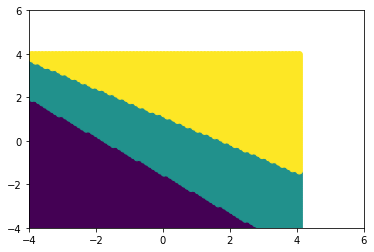

In [54]:
# 75+10000个点一起画
# plt.scatter(np.vstack((x_train,x_test))[:, 0], np.vstack((x_train,x_test))[:, 1], c =np.append(t_train,t_test_pred))  # maybe the color
plt.scatter(x_test[:, 0], x_test[:, 1], c=t_test_pred)  # maybe the color
plt.xlim([-4, 6])
plt.ylim([-4, 6])
# 之前均值化了

In [89]:
np.save("t_test_1.npy",t_test_pred)# 准确率不高，重新跑几遍可能就好了，因为那个训练集什么的是随机选的，这里训练样本实在太少，所以不具有代表性，反倒是有1万个左右的测试集
# 训练集和验证集比例可以调整一下
# 最开始不错的那份是t_test.npy,所以再存的都是叫t_test_1.npy

In [90]:
print(best_w)

[[-0.77395006  0.0283039   0.74564616]
 [-0.9570053  -0.10185471  1.05886001]
 [-0.4228452   1.05157067 -0.62872547]]


In [29]:
print(t_test_pred.shape)

(10000,)


(-4, 6)

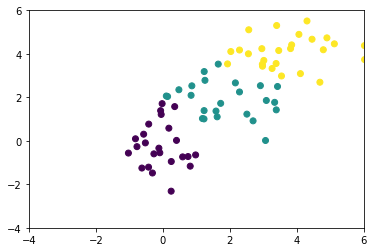

In [91]:
# 这一段检验要把前面的改了
# t_train_pred = best_softmax.predict(x_train)
# x_train = np.load('x_train.npy')
# plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train_pred)  # maybe the color
# plt.xlim([-4, 6])
# plt.ylim([-4, 6])

In [93]:
print(mean_image)

[1.89985978 2.03252308]
